<a href="https://colab.research.google.com/github/eltonfmoraes/Modulo4Pos/blob/main/Aulas_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aula 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

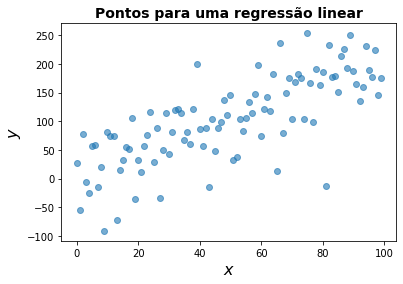

1.9850551363966769
5.495384904636339


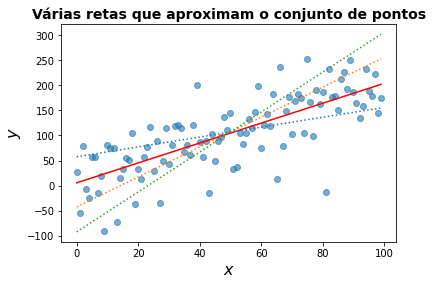

In [ ]:
x = np.arange(0,100)
y = 2*x + 3
y1 = y + norm.rvs(loc=0, scale=50, size=100, random_state=1234)

plt.scatter(x, y1, alpha=0.6)
plt.title('Pontos para uma regressão linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

# A diagonal da matriz contém a covariância entre cada variável e ela mesma
b = np.cov(x,y1)[1,0] / np.var(x); print(b)
a = np.mean(y1) - b*np.mean(x); print(a)

y2 = a+ b*x
y3 = (y2[51]-50*(b-1))+(b-1)*x
y4 = (y2[51]-50*(b+1))+(b+1)*x
y5 = (y2[51]-50*(b+2))+(b+2)*x

plt.scatter(x,y1,alpha=0.6)
plt.plot(x,y2,'r')
plt.plot(x,y3,linestyle='dotted')
plt.plot(x,y4,linestyle='dotted')
plt.plot(x,y5,linestyle='dotted')

plt.title('Várias retas que aproximam o conjunto de pontos', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

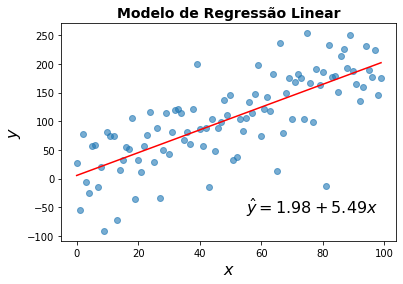

In [ ]:
plt.scatter(x,y1,alpha=0.6)
plt.plot(x,y2,'r')

plt.title('Modelo de Regressão Linear',fontsize=14,weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.text(55,-60,'$\hat{y} = 1.98 + 5.49x $',fontsize=16)
plt.show

Modelo de Regressão, Dataset: I  
1.991 x + 2.984
Modelo de Regressão, Dataset: II  
-2.009 x + 68.98
Modelo de Regressão, Dataset: III  
58.39 x - 19.82
Modelo de Regressão, Dataset: IV  
171.9 x + 726.9


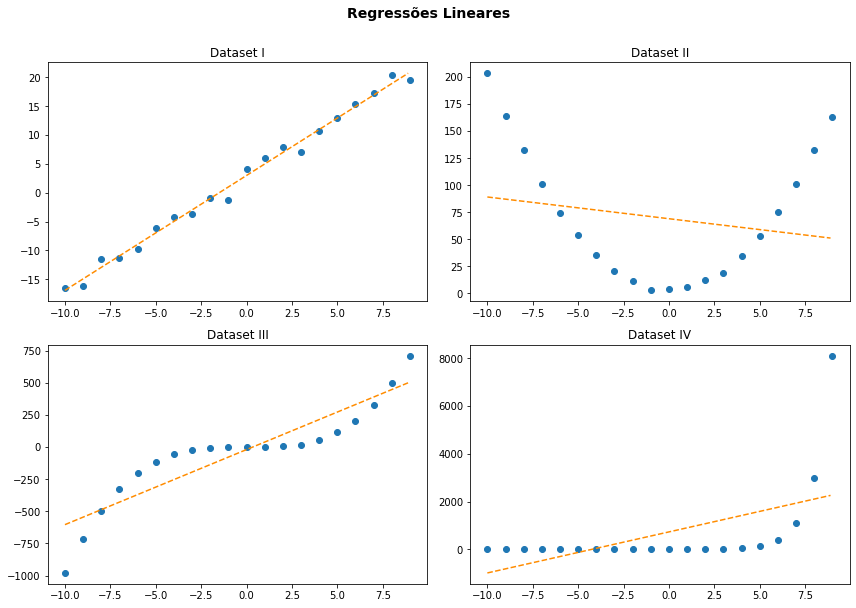

In [ ]:
# Avaliando o modelo

x = np.arange(-10,10,1)
ruido = norm.rvs(loc=0,scale=1,size=len(x),random_state=1234)
df = pd.DataFrame({'dataset':'I','x':x,'y':2*x+3+ruido})
df = pd.concat([df,pd.DataFrame({'dataset':'II','x':x,'y':2*x**2+3+ruido})])
df = pd.concat([df,pd.DataFrame({'dataset':'III','x':x,'y':x**3-2*x+ruido})])
df = pd.concat([df,pd.DataFrame({'dataset':'IV','x':x,'y':np.exp(1)**x+ruido})])

df

fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('Regressões Lineares',fontsize=14,weight='bold',y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]
  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)
  print('Modelo de Regressão, Dataset:',ds_type,p)

  ax[i//2,i%2].scatter(ds.x,ds.y)
  x = np.arange(ds.x.min(),ds.x.max(),0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange',linestyle='dashed')
  ax[i//2,i%2].set_title('Dataset '+ ds_type)
  i += 1

plt.tight_layout()
plt.show()

In [ ]:
R2 = {}
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]
  z = np.polyfit(ds.x,ds.y,1)
  p = np.poly1d(z)

  R2[ds_type] = 1 - sum((ds.y - p(ds.x))**2) / sum((ds.y - np.mean(y))**2)

for dataset, r2 in R2.items():
  print('Dataset ' + dataset + ', R-Square = ' + str(np.round(r2,4)))

Dataset I, R-Square = 0.9999
Dataset II, R-Square = 0.2481
Dataset III, R-Square = 0.85
Dataset IV, R-Square = 0.3463


### **Modelos de Regressão**

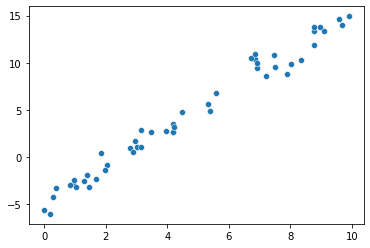

,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm

rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x-5+rng.randn(50)
sns.scatterplot(x=x,y=y)
plt.show()

df = pd.DataFrame({'x':x,'y':y})
df.head()

In [ ]:
model = sm.ols(formula='y~x',data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           5.71e-42
Time:                        21:35:59   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

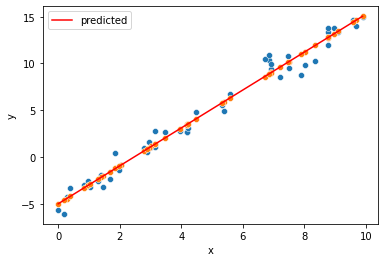

In [ ]:
df['predicted'] = result.predict(df.x)

sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='predicted',data=df)
sns.lineplot(x='x',y='predicted',data=df,color='red',label='predicted')
plt.legend()
plt.show()

In [ ]:
# Estudo de caso - Veículos

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv',index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
# Preparando os dados

df.columns = [x.replace('.','') for x in df.columns]
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
df.describe(include='all')

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
count,93,93,93,93.000000,93.000000,93.000000,93.000000,93.000000,93,93,...,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000,93,93
unique,32,93,6,NaN,NaN,NaN,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,93
top,Chevrolet,Integra,Midsize,NaN,NaN,NaN,NaN,NaN,Driver only,Front,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Acura Integra
freq,8,1,22,NaN,NaN,NaN,NaN,NaN,43,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,1
mean,NaN,NaN,NaN,17.125806,19.509677,21.898925,22.365591,29.086022,NaN,NaN,...,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226,NaN,NaN
std,NaN,NaN,NaN,8.746029,9.659430,11.030457,5.619812,5.331726,NaN,NaN,...,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510,NaN,NaN
min,NaN,NaN,NaN,6.700000,7.400000,7.900000,15.000000,20.000000,NaN,NaN,...,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000,NaN,NaN
25%,NaN,NaN,NaN,10.800000,12.200000,14.700000,18.000000,26.000000,NaN,NaN,...,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000,NaN,NaN
50%,NaN,NaN,NaN,14.700000,17.700000,19.600000,21.000000,28.000000,NaN,NaN,...,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000,NaN,NaN
75%,NaN,NaN,NaN,20.300000,23.300000,25.300000,25.000000,31.000000,NaN,NaN,...,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000,NaN,NaN


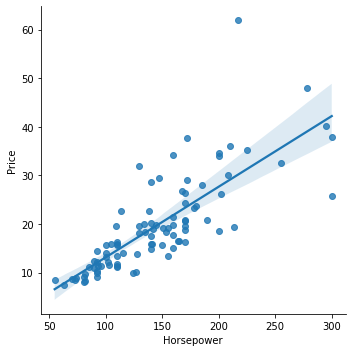

In [ ]:
# Regressão linear simples

sns.lmplot(x='Horsepower',y='Price',data=df)
plt.show()

In [ ]:
model = sm.ols(formula='Price~Horsepower',data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     149.3
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           6.84e-21
Time:                        21:05:24   Log-Likelihood:                -297.23
No. Observations:                  93   AIC:                             598.5
Df Residuals:                      91   BIC:                             603.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3988      1.820     -0.769      0.4

In [ ]:
# Predição de novos valores

x = pd.DataFrame({'Horsepower':[150,180]})
result.predict(x)

0    20.406915
1    24.768052
dtype: float64

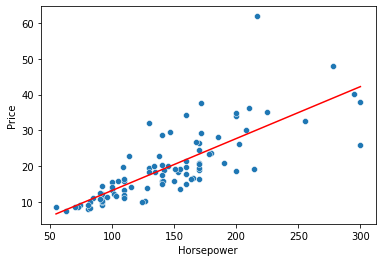

In [ ]:
df['predicted'] = result.predict()

sns.scatterplot(x='Horsepower',y='Price',data=df)
sns.lineplot(x='Horsepower',y='predicted',data=df,color='red')
plt.show()

In [ ]:
# Regressão múltipla

model = sm.ols(formula = 'Price~Passengers + Length + Wheelbase + Width +\
        Turncircle + Luggageroom + Weight + Horsepower + EngineSize +\
        RPM',data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.94
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.32e-16
Time:                        21:05:37   Log-Likelihood:                -251.04
No. Observations:                  82   AIC:                             524.1
Df Residuals:                      71   BIC:                             550.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1792     28.749      1.850      

In [ ]:
model = sm.ols(formula = 'Price~Wheelbase + Width + Horsepower - 1',data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              476.8
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                    4.19e-55
Time:                        21:05:41   Log-Likelihood:                         -286.90
No. Observations:                  93   AIC:                                      579.8
Df Residuals:                      90   BIC:                                      587.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x = pd.DataFrame({'Wheelbase':[df.Wheelbase.mean()],
                  'Width':[df.Width.mean()],
                  'Horsepower':[df.Horsepower.mean()]})
result.predict(x)

0    19.48232
dtype: float64

In [ ]:
# Adicionando variáveis categóricas

model = sm.ols(formula = 'Price~Origin + Wheelbase + Width + Horsepower - 1',data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     53.85
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           7.17e-23
Time:                        21:05:50   Log-Likelihood:                -284.82
No. Observations:                  93   AIC:                             579.6
Df Residuals:                      88   BIC:                             592.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Origin[USA]        -0.2091     14.536     

In [ ]:
# Regressão logística
%load_ext rpy2.ipython

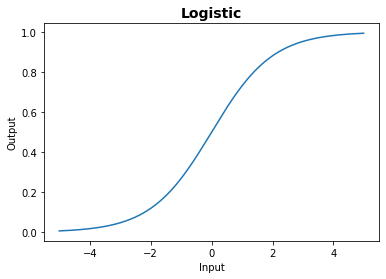

In [ ]:
# Função logística

x = np.arange(-5,5,0.01)
y = 1/(1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic',fontsize=14,weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

In [ ]:
# Estudo de caso - transmissão dos veículos

df['Manual'] = df['Mantransavail'].apply(lambda x: 1 if 'Yes' in x else 0)
df.head()

df.Manual.value_counts()

1    61
0    32
Name: Manual, dtype: int64

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin', 'Make',
       'predicted', 'Manual'],
      dtype='object')

In [ ]:
X_train = df[['EngineSize','Horsepower','RPM','Price','Weight']]
Y_train = df['Manual']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[-0.84623734,  0.00713032,  0.00141883, -0.01854519, -0.00161397]])

In [ ]:
# Avaliando o modelo

y_pred = logreg.predict(X_train)
df['Manual_predict'] = y_pred
df[['Manual','Manual_predict']]

,Manual,Manual_predict
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
89,1,0
90,1,1
91,1,1
92,1,1


In [ ]:
# Percentual de acerto

#sum(df['Manual'] == df['Manual_predict'])/len(df)
logreg.score(X_train,Y_train)

0.8279569892473119

In [ ]:
df.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Type'])
df.head()

,Manufacturer,Model,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,...,Make,predicted,Manual,Manual_predict,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
1,Acura,Integra,12.9,15.9,18.8,25,31,None,Front,4,...,Acura Integra,18.953203,1,1,0,0,0,1,0,0
2,Acura,Legend,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Acura Legend,27.675476,1,1,0,0,1,0,0,0
3,Audi,90,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Audi 90,23.605082,1,1,1,0,0,0,0,0
4,Audi,100,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,...,Audi 100,23.605082,1,1,0,0,1,0,0,0
5,BMW,535i,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,BMW 535i,28.838446,1,1,0,0,1,0,0,0


In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'MinPrice', 'Price', 'MaxPrice', 'MPGcity',
       'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Revpermile', 'Mantransavail', 'Fueltankcapacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turncircle',
       'Rearseatroom', 'Luggageroom', 'Weight', 'Origin', 'Make', 'predicted',
       'Manual', 'Manual_predict', 'Type_Compact', 'Type_Large',
       'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van'],
      dtype='object')

In [ ]:
X_train = df[['EngineSize','Horsepower','RPM','Price','Weight',
              'Type_Compact','Type_Large','Type_Midsize',
              'Type_Small','Type_Sporty','Type_Van']]
Y_train = df['Manual']

from sklearn.linear_model import LogisticRegression

# Criando o modelo
logreg = LogisticRegression(max_iter=1000)

# Treinando o modelo
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logreg.score(X_train,Y_train)

0.8602150537634409

## **Aula 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

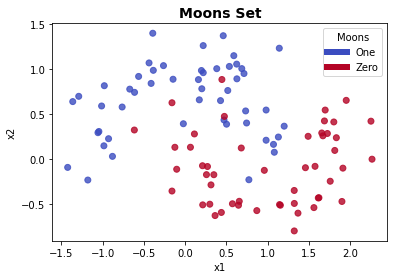

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 1234)
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines,['One','Zero'], loc='upper right', title='Moons')
plt.show()

print(df.head())

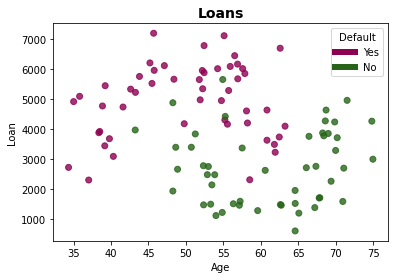

         age         loan  default
0  41.604235  4732.639984        0
1  45.688635  7188.319998        0
2  64.570169  1522.549822        1
3  52.984240  2752.321406        1
4  74.792752  4261.263330        1


In [ ]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 1234)

df_loans = pd.DataFrame({'age':X[:,0],'loan':X[:,1],'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel('Age')
plt.ylabel('Loan')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines,['Yes','No'], loc='upper right', title='Default')
plt.show()

print(df_loans.head())

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
print(clf)

LogisticRegression(max_iter=1000)


In [ ]:
X = df[['x1','x2']]
y = df.y

clf.fit(X,y)
print(clf.coef_,clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


In [ ]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [ ]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

In [ ]:
clf.score(X,y)

0.87

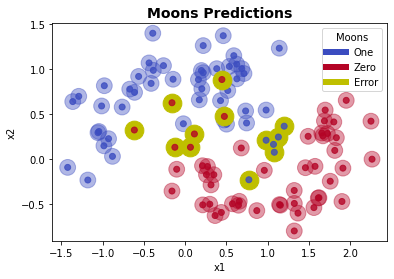

In [ ]:
cmap_data = plt.cm.coolwarm

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250, cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions', weight='bold', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6),
                Line2D([0],[0], color='y', lw=6)]
plt.legend(custom_lines,['One','Zero','Error'], loc='upper right', title='Moons')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


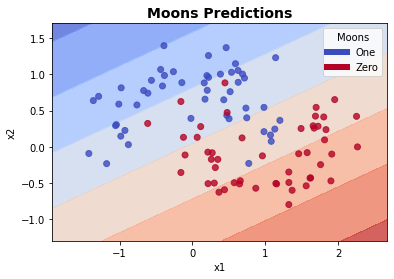

In [ ]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf,'decision_function'):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions', weight='bold', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines,['One','Zero'], loc='upper right', title='Moons')
plt.show()

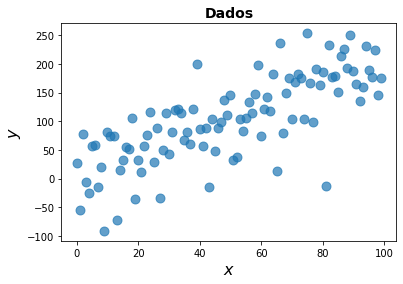

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [ ]:
# empregar um estimador de regressão linear

from scipy.stats import norm

x = np.arange(0,100)
y = 2*x + 3 + norm.rvs(loc=0, scale=50, size=100, random_state=1234)

plt.scatter(x=x, y=y, s=80, alpha=0.7)
plt.title('Dados', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

print(df.head())

In [ ]:
# Import do estimador
from sklearn.linear_model import LinearRegression

# Preparação dos dados X e y do estimador (variáveis preditoras e objetivo)
X = x.reshape(-1,1)
y = y.reshape(-1,1)

# Instanciação e configuração do estimador
lm = LinearRegression()
print(lm)

# Ajuste do modelo (treinamento ou estimativa dos parâmetros)
lm.fit(X,y)
print(lm.coef_, lm.intercept_)

LinearRegression()


In [ ]:
# Predição
lm.predict(X)[0:10]

array([[ 6.4779872 ],
       [ 8.44319178],
       [10.40839637],
       [12.37360095],
       [14.33880554],
       [16.30401012],
       [18.26921471],
       [20.23441929],
       [22.19962388],
       [24.16482846]])

In [ ]:
# Obtenção de métricas e Avaliação do modelo
lm.score(x.reshape(-1,1), y.reshape(-1,1))

0.565013962458061

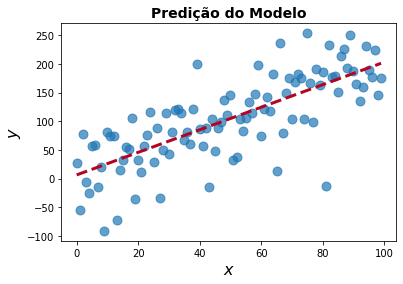

In [ ]:
y_pred = lm.predict(X)

plt.scatter(x=x, y=y.reshape(1,-1)[0], s=80, alpha=0.7)
plt.plot(x, y_pred.reshape(1,-1)[0], color=cmap_data(1.), lw=3, linestyle='dashed')
plt.title('Predição do Modelo', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

In [ ]:
# Conjuntos de treinamento e teste

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})

from sklearn.linear_model import LogisticRegression

X = df[['x1','x2']]
y = df.y

clf = LogisticRegression(max_iter=1000)
clf.fit(X,y)

y_pred = clf.predict(X)

print(y_pred[0:10],'...')
print(clf.score(X,y))

[0 0 1 1 1 1 1 0 0 0] ...
0.87


In [ ]:
# Modelo com a separação dos conjuntos de Treinamento e Teste

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(y_pred[0:10],'...')
print(clf.score(X,y))

sum(y_test != y_pred)

[0 1 0 0 0 0 1 1 0 1] ...
0.86


2

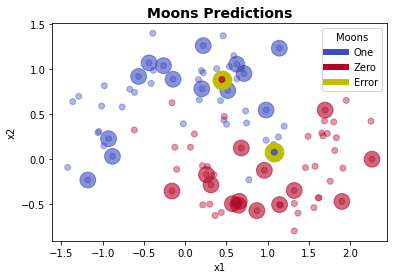

In [ ]:
cmap_data = plt.cm.coolwarm 

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()

In [ ]:
# Caso risco de doença cardíaca

df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isnull().sum() / len(df)

print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


In [ ]:
# Aplicando modelo logístico

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(y_pred[0:10],'...')
print(clf.score(X,y))

[0 0 1 0 0 0 0 0 0 0] ...
0.8537452159650082


In [ ]:
# Predição de novos casos

X_new = pd.DataFrame(df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75)).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [ ]:
clf.predict(X_new)

array([0, 0])

In [ ]:
# Predição de novos casos

X_new = pd.DataFrame(df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.9)).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,62.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,300.0,165.0,98.0,31.282,94.0,97.6
1,1,62.0,4.0,1.0,30.0,0.0,0.0,1.0,0.0,285.8,157.0,98.4,30.220,90.0,99.0


In [ ]:
clf.predict(X_new)

array([0, 0])

In [ ]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade:\n')
print(accuracy)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, labels=[1,0]))


Matriz de Confusão:

[[ 14 153]
 [ 10 921]]

Score de Acuracidade:

0.8515482695810564

Classification Report:

              precision    recall  f1-score   support

           1       0.58      0.08      0.15       167
           0       0.86      0.99      0.92       931

    accuracy                           0.85      1098
   macro avg       0.72      0.54      0.53      1098
weighted avg       0.82      0.85      0.80      1098



In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

TP,FP,FN,TN = cm.ravel()
print('\nTP = ',TP,'\nFP = ',FP,'\nFN = ',FN,'\nTN = ',TN)


Matriz de Confusão:

[[ 14 153]
 [ 10 921]]

TP =  14 
FP =  153 
FN =  10 
TN =  921


In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Accuracy

0.8515482695810564

In [ ]:
Precision = TP/(TP+FP)
Precision

0.08383233532934131

In [ ]:
Recall = TP/(TP+FN)
Recall

0.5833333333333334

In [ ]:
F1_score = 2/((1/Recall) + (1/Precision))
F1_score

0.14659685863874347

## **Aula 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.neighbors import DistanceMetric

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


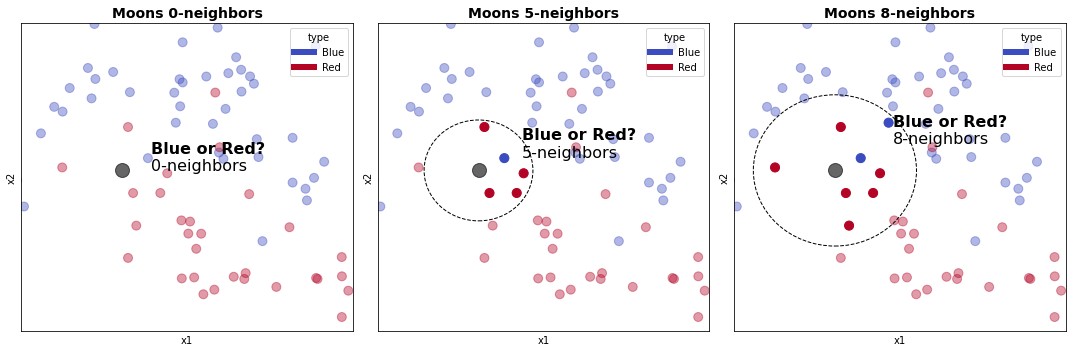

In [ ]:
from sklearn.datasets import make_moons
from sklearn.neighbors import DistanceMetric
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
moons = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

X, y = make_moons(n_samples=1, noise=0.25, random_state=123)
# amoon = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
amoon = pd.DataFrame({'x1':[-.2], 'x2':[.3]})

dist = DistanceMetric.get_metric('euclidean')
moons['distance'] = dist.pairwise(moons[['x1','x2']],amoon[['x1','x2']])

f, ax = plt.subplots(1,3,figsize=(15,5))
cmap_data = plt.cm.coolwarm 

for i in range(3):
  neighbors = moons.nsmallest([0,5,8][i],'distance')
  ax[i].scatter(moons.x1, moons.x2, c=moons.y, cmap=cmap_data, alpha=0.4, s=80)
  ax[i].scatter(neighbors.x1, neighbors.x2, c=neighbors.y, cmap=cmap_data, s=80)
  ax[i].plot(amoon.x1, amoon.x2, 'ko', markersize=14, alpha=0.6)

  a_circle = plt.Circle((amoon.x1, amoon.x2), neighbors.distance.max()+0.05, edgecolor='k', linestyle='dashed',fill=False)
  ax[i].add_artist(a_circle)

  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,'Blue or Red?\n', weight='bold', fontsize=16)
  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,' \n' + str([0,5,8][i]) + '-neighbors', fontsize=16)
  ax[i].set_title('Moons ' + str([0,5,8][i]) + '-neighbors',weight='bold',fontsize=14)
  ax[i].set_xlabel("x1")
  ax[i].set_ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]
  ax[i].legend(custom_lines, ['Blue', 'Red'], loc='upper right',title='type')

  ax[i].set_xlim([-0.9,1.4])
  ax[i].set_ylim([-0.9,1.4])
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  # ax[i].axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
# Prever empréstimos

loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


In [ ]:
# Exercício
idade = pd.DataFrame({'age':[6,7,7,5,8,4,4,3,1,1],
                      'classe':['A','B','B','A','A','A','C','C','B','A']})

case = pd.DataFrame({'age':[7.2]})

display(idade)
display(case)

,age,classe
0,6,A
1,7,B
2,7,B
3,5,A
4,8,A
5,4,A
6,4,C
7,3,C
8,1,B
9,1,A


,age
0,7.2


In [ ]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(idade[['age']],case[['age']])

idade['distance'] = d
display(idade.sort_values('distance'))

k3_neighbors = idade.nsmallest(5,'distance')
display(k3_neighbors)

# Fim exercício

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


,age,classe,distance
1,7,B,0.2
2,7,B,0.2
4,8,A,0.8
0,6,A,1.2
3,5,A,2.2
5,4,A,3.2
6,4,C,3.2
7,3,C,4.2
8,1,B,6.2
9,1,A,6.2


,age,classe,distance
1,7,B,0.2
2,7,B,0.2
4,8,A,0.8
0,6,A,1.2
3,5,A,2.2


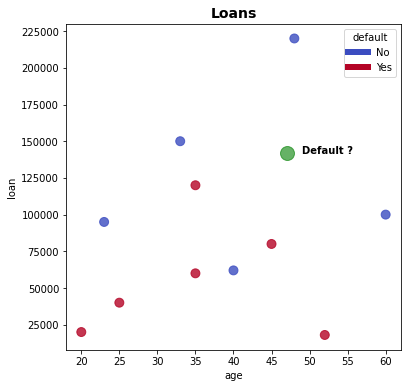

In [ ]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan, 'Default ?', weight='bold')
plt.title('Loans', weight='bold', fontsize=14)
plt.xlabel('age')
plt.ylabel('loan')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['No','Yes'], loc='upper right', title='default')
plt.show()

In [ ]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['age','loan']],case[['age','loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012
6,23,95000,0,47000.006128
2,45,80000,1,62000.000032
9,48,220000,0,78000.000006
7,40,62000,0,80000.000306
1,35,60000,1,82000.000878
0,25,40000,1,102000.002373
3,20,20000,1,122000.002988


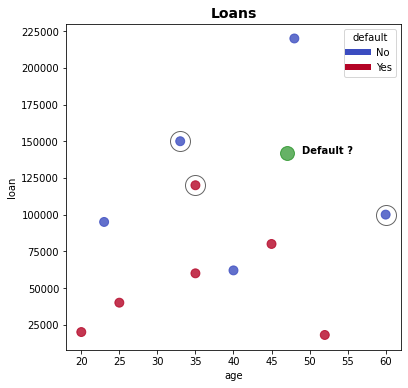

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [ ]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan, 'Default ?', weight='bold')
plt.title('Loans', weight='bold', fontsize=14)
plt.xlabel('age')
plt.ylabel('loan')

custom_lines = [Line2D([0],[0], color=cmap_data(0.), lw=6),
                Line2D([0],[0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['No','Yes'], loc='upper right', title='default')
plt.show()

display(k3_neighbors)

In [ ]:
# Normalizando os dados

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['loan']],case[['loan']])

loans['distance_loans'] = d
display(loans.sort_values('distance'))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


,age,loan,default,distance,distance_loans
10,33,150000,0,8000.012250,8000.0
4,35,120000,1,22000.003273,22000.0
8,60,100000,0,42000.002012,42000.0
6,23,95000,0,47000.006128,47000.0
2,45,80000,1,62000.000032,62000.0
9,48,220000,0,78000.000006,78000.0
7,40,62000,0,80000.000306,80000.0
1,35,60000,1,82000.000878,82000.0
0,25,40000,1,102000.002373,102000.0
3,20,20000,1,122000.002988,122000.0


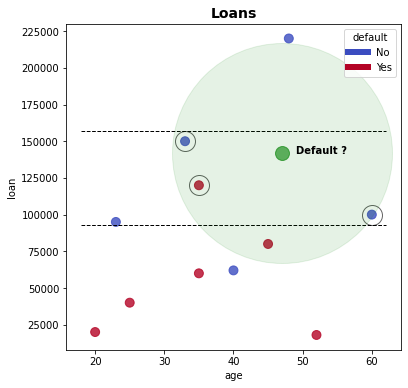

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [ ]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm 

ax.plot(case.age, case.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.hlines(157000,18,62,linestyles='dashed',lw=1)
plt.hlines(93000,18,62,linestyles='dashed',lw=1)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

In [ ]:
from sklearn.preprocessing import minmax_scale

minmax_scale(loans[['age','loan']])

array([[0.125     , 0.10891089],
       [0.375     , 0.20792079],
       [0.625     , 0.30693069],
       [0.        , 0.00990099],
       [0.375     , 0.5049505 ],
       [0.8       , 0.        ],
       [0.075     , 0.38118812],
       [0.5       , 0.21782178],
       [1.        , 0.40594059],
       [0.7       , 1.        ],
       [0.325     , 0.65346535]])

In [ ]:
# Usar estimadores no lugar de funções

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(loans[['age','loan']]))

print(scaler.data_max_)

print(scaler.transform(loans[['age','loan']]))
print(scaler.transform(case))

MinMaxScaler()
[6.0e+01 2.2e+05]
[[0.125      0.10891089]
 [0.375      0.20792079]
 [0.625      0.30693069]
 [0.         0.00990099]
 [0.375      0.5049505 ]
 [0.8        0.        ]
 [0.075      0.38118812]
 [0.5        0.21782178]
 [1.         0.40594059]
 [0.7        1.        ]
 [0.325      0.65346535]]
[[0.675      0.61386139]]


In [ ]:
# Criando dados normalizados

loans_scaled = pd.DataFrame(scaler.transform(loans[['age','loan']]),columns=loans.columns[0:2])
loans_scaled = pd.concat([loans_scaled,loans[['default']]],axis=1)
display(loans_scaled)

case_scaled = pd.DataFrame(scaler.transform(case),columns=case.columns[0:2])
display(case_scaled)

,age,loan,default
0,0.125,0.108911,1
1,0.375,0.207921,1
2,0.625,0.306931,1
3,0.000,0.009901,1
4,0.375,0.504950,1
5,0.800,0.000000,1
6,0.075,0.381188,0
7,0.500,0.217822,0
8,1.000,0.405941,0
9,0.700,1.000000,0


,age,loan
0,0.675,0.613861


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


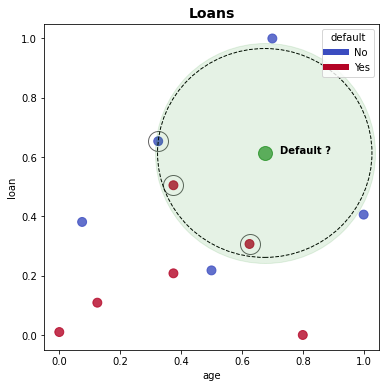

,age,loan,default,distance
2,0.625,0.306931,1,0.310977
4,0.375,0.504950,1,0.319158
10,0.325,0.653465,0,0.352234


In [ ]:
dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans_scaled[['age','loan']],case_scaled[['age','loan']])

loans_scaled['distance'] = d

k3_neighbors_scaled = loans_scaled.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case_scaled.age,case_scaled.loan,'go',markersize=220,alpha=0.10)
ax.scatter(k3_neighbors_scaled.age,k3_neighbors_scaled.loan,edgecolors='k',c='w',alpha=0.6,s=400)
ax.scatter(loans_scaled.age, loans_scaled.loan, c=loans_scaled.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case_scaled.age,case_scaled.loan,'go',markersize=14,alpha=0.6)

a_circle = plt.Circle((case_scaled.age,case_scaled.loan),k3_neighbors_scaled.distance.max(),edgecolor='k',linestyle='dashed',fill=False)
ax.add_artist(a_circle)

plt.text(case_scaled.age+0.05, case_scaled.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors_scaled)

In [ ]:
# Knn

from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

X = loans[['age','loan']]      
y = loans.default   

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)                 

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

Default?  Yes


In [ ]:
# Com valores categóricos

loans['Duration'] = ['Short','Long','Short','Undefined','Long','Short','Long','Short','Undefined','Long','Short'] 

case['Duration'] = ['Short'] 

display(loans)
display(case)

,age,loan,default,distance,distance_loans,Duration
0,25,40000,1,102000.002373,102000.0,Short
1,35,60000,1,82000.000878,82000.0,Long
2,45,80000,1,62000.000032,62000.0,Short
3,20,20000,1,122000.002988,122000.0,Undefined
4,35,120000,1,22000.003273,22000.0,Long
5,52,18000,1,124000.000101,124000.0,Short
6,23,95000,0,47000.006128,47000.0,Long
7,40,62000,0,80000.000306,80000.0,Short
8,60,100000,0,42000.002012,42000.0,Undefined
9,48,220000,0,78000.000006,78000.0,Long


,age,loan,Duration
0,47,142000,Short


In [ ]:
# Hot encode da variável categórica

pd.get_dummies(loans,prefix='Duration')

,age,loan,default,distance,distance_loans,Duration_Long,Duration_Short,Duration_Undefined
0,25,40000,1,102000.002373,102000.0,0,1,0
1,35,60000,1,82000.000878,82000.0,1,0,0
2,45,80000,1,62000.000032,62000.0,0,1,0
3,20,20000,1,122000.002988,122000.0,0,0,1
4,35,120000,1,22000.003273,22000.0,1,0,0
5,52,18000,1,124000.000101,124000.0,0,1,0
6,23,95000,0,47000.006128,47000.0,1,0,0
7,40,62000,0,80000.000306,80000.0,0,1,0
8,60,100000,0,42000.002012,42000.0,0,0,1
9,48,220000,0,78000.000006,78000.0,1,0,0


In [ ]:
pd.get_dummies(case,prefix='Duration')

,age,loan,Duration_Short
0,47,142000,1


In [ ]:
# Hot encode com estimador

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(loans[['Duration']])

display(hot_encode.categories_)

display(pd.DataFrame(hot_encode.transform(loans[['Duration']]).toarray(), columns = hot_encode.categories_))
display(pd.DataFrame(hot_encode.transform(case[['Duration']]).toarray(), columns = hot_encode.categories_))

[array(['Long', 'Short', 'Undefined'], dtype=object)]

,Long,Short,Undefined
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


,Long,Short,Undefined
0,0.0,1.0,0.0


In [ ]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = loans.drop(columns=['default','distance','distance_loans'])  
y = loans.default   

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(X[['Duration']])
X = pd.concat([ X, pd.DataFrame(hot_encode.transform(loans[['Duration']] ).toarray(), columns = hot_encode.categories_) ], axis=1 )
X = X.drop(columns=['Duration'])
case = pd.concat([ case, pd.DataFrame(hot_encode.transform(case[['Duration']] ).toarray(), columns = hot_encode.categories_) ], axis=1 )
case = case.drop(columns=['Duration'])

display(X)
display(case)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)                 

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

,age,loan,"(Long,)","(Short,)","(Undefined,)"
0,25,40000,0.0,1.0,0.0
1,35,60000,1.0,0.0,0.0
2,45,80000,0.0,1.0,0.0
3,20,20000,0.0,0.0,1.0
4,35,120000,1.0,0.0,0.0
5,52,18000,0.0,1.0,0.0
6,23,95000,1.0,0.0,0.0
7,40,62000,0.0,1.0,0.0
8,60,100000,0.0,0.0,1.0
9,48,220000,1.0,0.0,0.0


,age,loan,"(Long,)","(Short,)","(Undefined,)"
0,47,142000,0.0,1.0,0.0


Default?  No


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Caso câncer de mama

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
# Verificando valores nulos
df.isnull().sum()/len(df)

ID       0.00000
V1       0.00000
V2       0.00000
V3       0.00000
V4       0.00000
V5       0.00000
V6       0.02289
V7       0.00000
V8       0.00000
V9       0.00000
class    0.00000
dtype: float64

In [ ]:
# Excluindo valores nulos

df['V6'] = df[['V6']].fillna(df['V6'].mean())
df.isnull().sum()/len(df)

ID       0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
class    0.0
dtype: float64

In [ ]:
# Aplicando o modelo

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['ID','class'])
y = df['class']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)                 

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

['benign' 'benign' 'malignant' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign'] ...
0.9699570815450643


In [ ]:
X_new = pd.DataFrame(df.drop(columns=['ID','class']).quantile([0.10,0.25,0.75,0.90])).reset_index(drop=True)
display(X_new)
X_new_scaled = scaler.transform(X_new)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
2,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0
3,9.0,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0


In [ ]:
clf.predict(X_new_scaled)

X_new['predicted'] = clf.predict(X_new_scaled)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,predicted
0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,benign
1,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,benign
2,6.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,1.0,malignant
3,9.0,9.0,8.0,8.0,6.0,10.0,7.0,9.0,3.0,malignant


In [ ]:
# Distância de Hamming para Strings

def hamming_distance(string1,string2):
  dist_counter = 0
  for n in range(len(string1)):
    if string1[n] != string2[n]:
      dist_counter += 1
  return dist_counter

hamming_distance('ACGTACGT','ACGTTACG')

4

In [ ]:
def hamming_distance2(string1,string2):
  return sum(xi != yi for xi, yi in zip(string1,string2))

hamming_distance2('ACGTACGT','ACGTTACG')

4

In [ ]:
# Distância Cosseno

from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

print(cosine_similarity([[0,1,1]],[[0,2,2]]))
print(cosine_distances([[0,1,1]],[[0,2,2]]))

[[1.]]
[[2.22044605e-16]]


In [ ]:
dfd = pd.read_excel('http://meusite.mackenzie.br/rogerio/FCI22020/TFIDFExample2.xlsx',
                    skiprows=range(0,3),nrows=10,index_col=0,usecols=range(0,2),header=None).reset_index()
dfd.columns = ['tf(i,j)','Text']                   
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/FCI22020/TFIDFExample2.xlsx',
                   skiprows=range(0,16),nrows=9,index_col=0,usecols=range(0,14))
df[['Text']] = dfd[['Text']]
display(df)

,"tf(i,j)",system,user,graph,trees,response,EPS,interface,human,survey,computer,minors,time,Text
1,d1,0,0,0,0,0,0,1,1,0,1,0,0,Human machine interface for ABC computer appli...
2,d2,1,1,0,0,1,0,0,0,1,1,0,1,A survey of user opinion of computer system re...
3,d3,1,1,0,0,0,1,1,0,0,0,0,0,The EPS user interface management system.
4,d4,2,0,0,0,0,1,0,1,0,0,0,0,System and human system engineering testing in...
5,d5,0,1,0,0,1,0,0,0,0,0,0,1,Relation to user perceived response time to er...
6,d6,0,0,0,1,0,0,0,0,0,0,0,0,"The generation of random, binary, ordered trees."
7,d7,0,0,1,1,0,0,0,0,0,0,0,0,The intersection graph of paths in trees.
8,d8,0,0,1,1,0,0,0,0,0,0,1,0,Graph minors IV: Widths of trees and well-quas...
9,d9,0,0,1,0,0,0,0,0,1,0,1,0,Graph minors: A survey.


In [ ]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

docs = df.drop(columns=['tf(i,j)','Text'])
doc = df[df['tf(i,j)'] == 'd1'].drop(columns=['tf(i,j)','Text'])

print(cosine_distances(docs,doc))

[[0.        ]
 [0.76429774]
 [0.71132487]
 [0.76429774]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]


In [ ]:
dist = DistanceMetric.get_metric('euclidean')
print(dist.pairwise(docs,doc))

[[0.        ]
 [2.64575131]
 [2.23606798]
 [2.64575131]
 [2.44948974]
 [2.        ]
 [2.23606798]
 [2.44948974]
 [2.44948974]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,11) for d in ['euclidean','manhattan']]:

  clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

  clf.fit(X_train, y_train)                 

  y_pred = clf.predict(X_test)

  print( k, d, np.round( clf.score(X_test,y_test), 4) )

2 euclidean 0.9095
2 manhattan 0.9286
3 euclidean 0.9429
3 manhattan 0.9381
4 euclidean 0.9381
4 manhattan 0.9333
5 euclidean 0.9429
5 manhattan 0.9333
6 euclidean 0.9381
6 manhattan 0.9286
7 euclidean 0.9429
7 manhattan 0.9333
8 euclidean 0.9381
8 manhattan 0.9333
9 euclidean 0.9381
9 manhattan 0.9381
10 euclidean 0.9381
10 manhattan 0.9429


In [ ]:
scores_means = {}

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:
  
  scores = []
  for i in range(0,25):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

    clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

    clf.fit(X_train, y_train)                 

    y_pred = clf.predict(X_test)
    
    scores.append(clf.score(X_test,y_test))

  scores_means[(k,d)] = np.mean(scores)
  
scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))

,k,metric,score
0,2,euclidean,0.909524
1,2,manhattan,0.928571
2,3,euclidean,0.942857
3,3,manhattan,0.938095
4,4,euclidean,0.938095
5,4,manhattan,0.933333
6,5,euclidean,0.942857
7,5,manhattan,0.933333
8,6,euclidean,0.938095
9,6,manhattan,0.928571



Best result:



,k,metric,score
2,3,euclidean,0.942857


In [ ]:
# Implementando o modelo

scores_means = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:
  
  scores = []
  for i in range(0,25):

    X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=123)

    clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

    clf.fit(X_train_val, y_train_val)                 

    y_pred = clf.predict(X_val)
    
    scores.append(clf.score(X_val,y_val))

  scores_means[(k,d)] = np.mean(scores)
  
scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))

,k,metric,score
0,2,euclidean,0.928571
1,2,manhattan,0.948980
2,3,euclidean,0.948980
3,3,manhattan,0.948980
4,4,euclidean,0.948980
5,4,manhattan,0.938776
6,5,euclidean,0.959184
7,5,manhattan,0.959184
8,6,euclidean,0.959184
9,6,manhattan,0.959184



Best result:



,k,metric,score
6,5,euclidean,0.959184


In [ ]:
k = scores_means.nlargest(1,'score').k.values[0]
metric = scores_means.nlargest(1,'score').metric.values[0]

clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= metric )
print(clf)
    
clf.fit(X_train, y_train)                 

print("accuracy: %0.3f" % clf.score(X_test,y_test),'\n')

KNeighborsClassifier(metric='euclidean')
accuracy: 0.943 



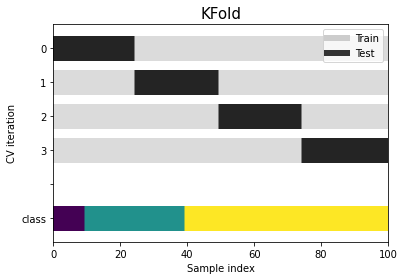

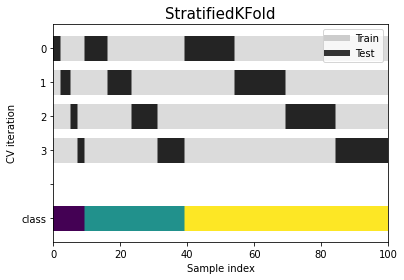

In [ ]:
# Cross Validation

cmap_data = plt.cm.viridis 
cmap_cv = plt.cm.binary

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    custom_lines = [Line2D([0], [0], color=cmap_cv(0.2), lw=6),
                Line2D([0], [0], color=cmap_cv(0.8), lw=6)]
    ax.legend(custom_lines, ['Train', 'Test'], loc='upper right')

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["", "class"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

from sklearn.model_selection import KFold, StratifiedKFold
np.random.seed(1338)

n_splits = 4

n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
plt.show()

fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
plt.show()

In [ ]:
# Aplicando o CV

from sklearn.model_selection import cross_val_score

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3, metric= 'euclidean' )

acc_scores = cross_val_score(clf, X_train, y_train, cv = 10)

print(acc_scores, '\n')
print("accuracy: %0.3f +/- %0.3f" % (acc_scores.mean(), acc_scores.std() * 2),'\n')

for metric in ['accuracy','f1_macro','precision_macro','recall_macro']:
  scores = cross_val_score(clf, X_train, y_train, cv = 4, scoring=metric)
  print(metric + ": %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

[0.97959184 0.93877551 1.         0.97959184 0.95918367 0.95918367
 1.         0.93877551 0.97959184 0.95833333] 

accuracy: 0.969 +/- 0.042 

accuracy: 0.971 +/- 0.008
f1_macro: 0.968 +/- 0.009
precision_macro: 0.970 +/- 0.009
recall_macro: 0.967 +/- 0.018


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

scores_means = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

for k, d in [(k,d) for k in range(2,9) for d in ['euclidean','manhattan']]:
  
  clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= d )

  acc_scores = cross_val_score(clf, X_train, y_train, cv = 5)             

  scores_means[(k,d)] = acc_scores.mean()
  
scores_means = pd.DataFrame(scores_means.values(), index=scores_means.keys()).reset_index()
scores_means.columns = ['k','metric','score']

# display(scores_means)
print('\nBest result:\n')
display(scores_means.nlargest(1,'score'))


Best result:



,k,metric,score
7,5,manhattan,0.975489


In [ ]:
k = scores_means.nlargest(1,'score').k.values[0]
metric = scores_means.nlargest(1,'score').metric.values[0]

clf = neighbors.KNeighborsClassifier(n_neighbors = k, metric= metric )
print(clf)
    
clf.fit(X_train, y_train)                 
        
print("accuracy: %0.3f" % clf.score(X_test,y_test),'\n')

KNeighborsClassifier(metric='manhattan')
accuracy: 0.933 



In [ ]:
# Grid Search

clf = neighbors.KNeighborsClassifier()
clf.get_params

# e do mesmo modo os hiperparâmetros da regressão logística são também obtidos
from sklearn.linear_model import LogisticRegression 
LogisticRegression().get_params

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv',index_col=0)
df['V6'] = df[['V6']].fillna(df['V6'].mean())

X = df.drop(columns=['ID','class'])
y = df['class']

scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimator = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10], 'metric': ['euclidean','manhattan']}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()

KNeighborsClassifier(metric='manhattan')

Detailed classification report:

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       138
   malignant       0.91      0.89      0.90        72

    accuracy                           0.93       210
   macro avg       0.93      0.92      0.93       210
weighted avg       0.93      0.93      0.93       210




## **Aula 5**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [30]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics.csv',sep=';')
display(df)

cases = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics_cases.csv',sep=';')
display(cases)

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,male,no,no,yes,yes,yes,good
1,Robin,male,no,no,yes,yes,yes,good
2,Catwoman,female,no,no,yes,no,yes,bad
3,Joker,male,no,no,no,no,no,bad
4,Alfred,male,no,yes,no,no,no,good
5,Penguin,male,yes,yes,no,no,no,bad


,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,female,yes,yes,no,yes,no,?
1,Riddler,male,yes,no,no,no,no,?


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['Name','class']).apply(LabelEncoder().fit_transform)
cases_labels = cases.drop(columns=['Name','class']).apply(LabelEncoder().fit_transform)

display( pd.concat([df.Name, df_labels, df['class']], axis=1) )
display( pd.concat([cases.Name, cases_labels, cases['class']], axis=1) )

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,1,0,0,1,1,1,good
1,Robin,1,0,0,1,1,1,good
2,Catwoman,0,0,0,1,0,1,bad
3,Joker,1,0,0,0,0,0,bad
4,Alfred,1,0,1,0,0,0,good
5,Penguin,1,1,1,0,0,0,bad


,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,0,0,1,0,1,0,?
1,Riddler,1,0,0,0,0,0,?


In [32]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['class']

clf = DecisionTreeClassifier(criterion='entropy')  

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


In [33]:
y_pred = clf.predict(cases_labels)
cases['class'] = y_pred
display( cases )

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batgirl,female,yes,yes,no,yes,no,good
1,Riddler,male,yes,no,no,no,no,bad


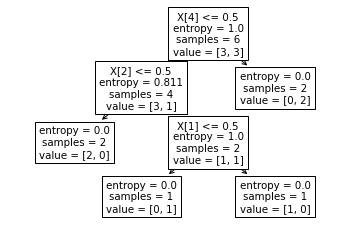

In [34]:
from sklearn import tree

tree.plot_tree(clf)
plt.show()

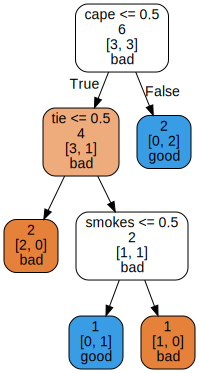

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df_labels.columns.values),  
                     class_names=list(sorted(df['class'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph.render('graph_cartoons') # para gravação em .pdf
graph 

In [36]:
df_tree = pd.concat([df_labels, df['class']], axis=1)

print('Root level')
print(60*'-')
display(df_tree)
print('Continue Next Level...')
display(df_tree[df_tree.cape<=0.5])
print('Terminal')
display(df_tree[df_tree.cape>0.5])

print('\n\n\nSecond level')
print(60*'-')
display(df_tree[df_tree.cape<=0.5])
print('Continue Next Level...')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie<=0.5)])

print('\n\n\nThird level')
print(60*'-')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5)])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes<=0.5) ])
print('Terminal')
display(df_tree[(df_tree.cape<=0.5) & (df_tree.tie>0.5) & (df_tree.smokes>0.5)])

Root level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
0,1,0,0,1,1,1,good
1,1,0,0,1,1,1,good
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Continue Next Level...


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
0,1,0,0,1,1,1,good
1,1,0,0,1,1,1,good





Second level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Continue Next Level...


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad





Third level
------------------------------------------------------------


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


Terminal


,sex,smokes,tie,mask,cape,ears,class
4,1,0,1,0,0,0,good


Terminal


,sex,smokes,tie,mask,cape,ears,class
5,1,1,1,0,0,0,bad


In [37]:
from scipy.stats import entropy
E = entropy( [1/2, 1/2] , base=2 )
E

1.0

In [38]:
E = entropy( 1 , base=2 )
E

0.0

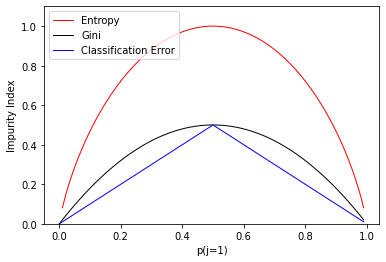

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, c, in zip(
      [ent, gini(x), c_err],
      ['Entropy', 'Gini', 'Classification Error'],
      ['red', 'black', 'blue']):
   line = ax.plot(x, j, label=lab, lw=1, color=c)

ax.legend(loc='upper left', ncol=1, fancybox=True, shadow=False)

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

In [40]:
def show_values(axs, orient="v", space=.01):
  def _single(ax):
      if orient == "v":
          for p in ax.patches:
              _x = p.get_x() + p.get_width() / 2
              _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
              value = '{:.2f}'.format(p.get_height())
              ax.text(_x, _y+0.01, value, ha="center", fontsize=14) 

  if isinstance(axs, np.ndarray):
      for idx, ax in np.ndenumerate(axs):
          _single(ax)
  else:
      _single(axs)

In [41]:
from scipy.stats import entropy

def informationgain(df,target,base=2):
  E = entropy( df[target].value_counts() / len(df) , base=base )

  E_x = {}

  for c in df.drop(columns=[target]):
    E_x[c] = []
    for v in df[c].unique():
      e = len(df[df[c]==v])/len(df) * entropy( df[df[c]==v]['class'].value_counts() / len(df[df[c]==v]), base=base )
      E_x[c].append(np.round(e,2))

  ig = {}

  for c, p in E_x.items():
    ig[c] = E - sum(p)

  return ig

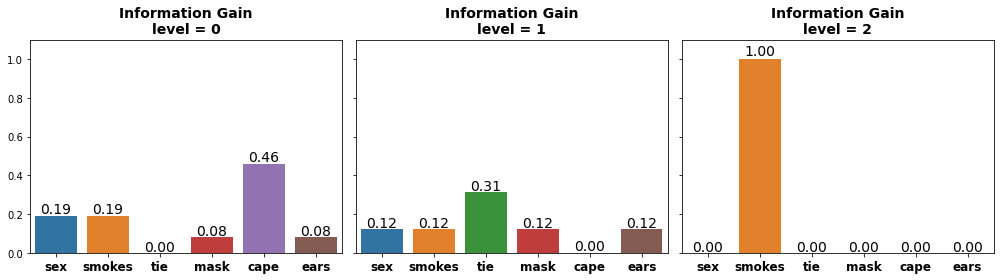

In [42]:
ig_root = informationgain(df=df.drop(columns=['Name']),target='class')
ig_level_1 = informationgain(df=df.drop(columns=['Name'])[df.cape == 'no'],target='class')
ig_level_2 = informationgain(df=df.drop(columns=['Name'])[ (df.cape == 'no') & (df.tie == 'yes') ],target='class')

f , ax = plt.subplots(1,3,figsize=(14,4),sharey=True)

for i, ig_  in enumerate([ ig_root, ig_level_1, ig_level_2 ]):
  sns.barplot(x=list(ig_.keys()), y=list(ig_.values()), ax=ax[i])
  ax[i].set_title('Information Gain\nlevel = ' + str(i), fontsize=14, weight='bold')
  ax[i].set_ylim([0,1.1])

  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12, weight='bold')
  show_values(ax[i])

plt.tight_layout()
plt.show() 

In [43]:
df_tree

,sex,smokes,tie,mask,cape,ears,class
0,1,0,0,1,1,1,good
1,1,0,0,1,1,1,good
2,0,0,0,1,0,1,bad
3,1,0,0,0,0,0,bad
4,1,0,1,0,0,0,good
5,1,1,1,0,0,0,bad


In [44]:
from sklearn.feature_selection import mutual_info_classif

print(mutual_info_classif(df_tree.drop(columns=['class']), df_tree['class'], discrete_features=True))

[0.13230412 0.13230412 0.         0.05663301 0.31825708 0.05663301]


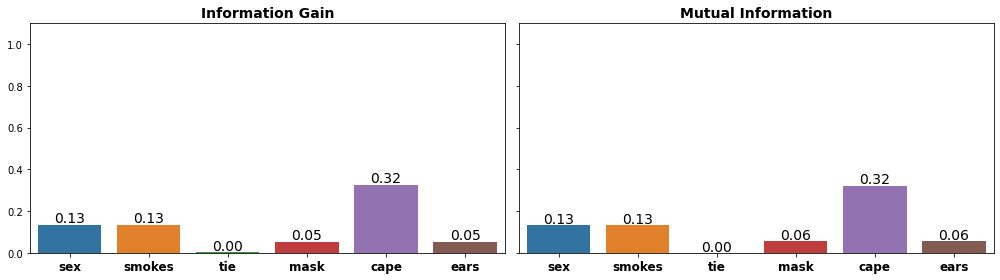

In [45]:
f , ax = plt.subplots(1,2,figsize=(14,4),sharey=True)

ig_root = informationgain(df=df.drop(columns=['Name']),target='class',base=None)

i = 0
sns.barplot(x=list(ig_root.keys()), y=list(ig_root.values()), ax=ax[i])
ax[i].set_title('Information Gain', fontsize=14, weight='bold')
ax[i].set_ylim([0,1.1])

ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12, weight='bold')
show_values(ax[i])

mutualinfo = mutual_info_classif(df_tree.drop(columns=['class']), df_tree['class'], discrete_features=True)

i = 1
sns.barplot(x=df_tree.drop(columns=['class']).columns, y=mutualinfo , ax=ax[i])
ax[i].set_title('Mutual Information', fontsize=14, weight='bold')
ax[i].set_ylim([0,1.1])

ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12, weight='bold')
show_values(ax[i])

plt.tight_layout()
plt.show()

In [46]:
df_tree.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sex       0.166667
smokes    0.166667
tie       0.266667
mask      0.300000
cape      0.266667
ears      0.300000
dtype: float64

In [47]:
from sklearn.feature_selection import VarianceThreshold

X = df_tree.drop(columns=['class'])
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(X)

array([[1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

X = df_tree.drop(columns=['class'])
y = df_tree['class']

select_features = SelectKBest(mutual_info_classif, k=3).fit(X, y)
print( select_features.get_support() )
print( X.columns[select_features.get_support()] )

X_new = select_features.transform(X)

pd.DataFrame( X_new, columns= X.columns[select_features.get_support()] )  

[ True False False  True  True False]
Index(['sex', 'mask', 'cape'], dtype='object')


,sex,mask,cape
0,1,1,1
1,1,1,1
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Optimal number of features : 1


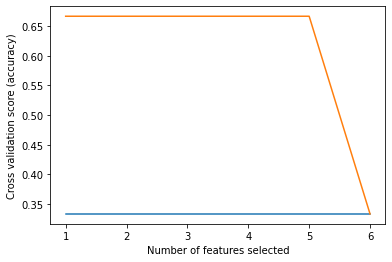

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

X = df_labels
y = df['class']

clf = DecisionTreeClassifier(criterion='entropy')  
clf.fit(X,y)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=2,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [50]:
pd.DataFrame({'atributtes':  df_labels.columns, 'feature_importances': clf.feature_importances_}).sort_values('feature_importances',ascending=False)

,atributtes,feature_importances
4,cape,0.459148
1,smokes,0.333333
2,tie,0.207519
0,sex,0.000000
3,mask,0.000000
5,ears,0.000000


In [51]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/ML/PlayBallcsv.csv')
df.head()

,Day,Outlook,Temperature,Humidity,Wind,Play ball
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['Day','Play ball']).apply(LabelEncoder().fit_transform)

pd.concat([ df_labels, df[['Play ball']] ], axis=1).head()

,Outlook,Temperature,Humidity,Wind,Play ball
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [53]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['Play ball']

clf = DecisionTreeClassifier()  

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


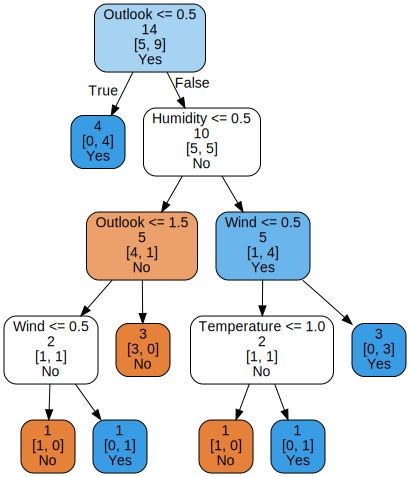

In [54]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df_labels.columns.values),  
                     class_names=list(sorted(df['Play ball'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph.render('graph_cartoons') # para gravação em .pdf
graph

In [55]:
print(X.columns)
print(mutual_info_classif(X, y, discrete_features=True))
print(clf.feature_importances_)

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')
[0.17103394 0.02025554 0.10524435 0.03335912]
[0.31555556 0.15555556 0.28       0.24888889]


In [56]:
from sklearn.linear_model import LogisticRegression # (*)
from sklearn.neighbors import KNeighborsClassifier # (*)
from sklearn.tree import DecisionTreeClassifier # (*)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier # (*)

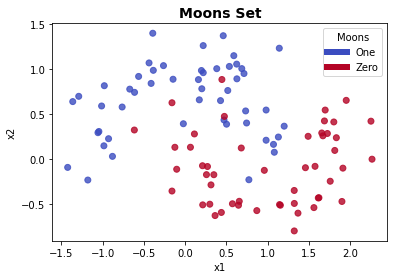

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [57]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm 

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [58]:
df.to_csv('moons.csv',index=None)

In [59]:
def border(clf):
  x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
  y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                      np.arange(y_min, y_max, 0.2))

  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)  
  plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
  plt.title(str(clf)[0:str(clf).index('(')] + ' Moons Predictions',weight='bold',fontsize=14)
  plt.xlabel("x1")
  plt.ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]

  plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

  plt.show()
  return

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier().get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier()>

LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


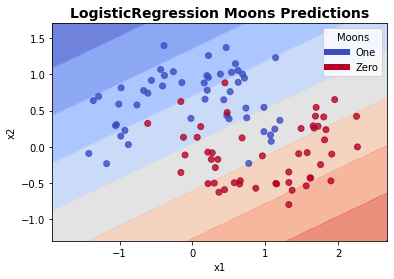


Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNeighborsClassifier(metric='euclidean', n_neighbors=4)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


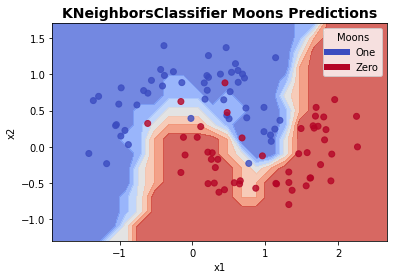


Detailed classification report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.80      0.89        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30


DecisionTreeClassifier(max_depth=2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


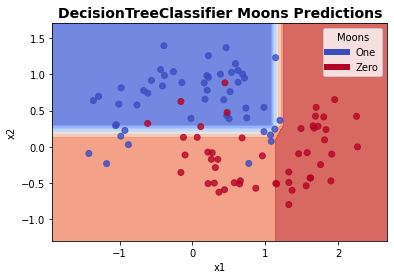


Detailed classification report:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


RandomForestClassifier(n_estimators=4)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


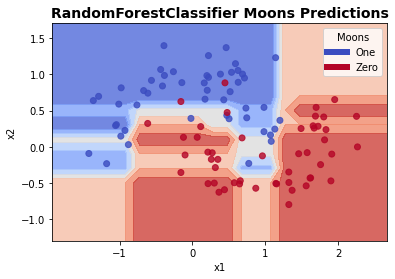


Detailed classification report:

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.73      0.85        15

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30


GradientBoostingClassifier(n_estimators=3)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


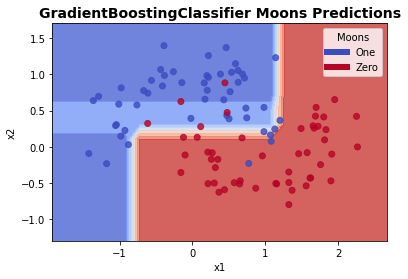


Detailed classification report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30




In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)


base_estimators = [ LogisticRegression(),
                    neighbors.KNeighborsClassifier(),
                    DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    GradientBoostingClassifier()]
                    
                               
param_grids = [ {},
                {'n_neighbors': [3,4,5], 'metric': ['euclidean','manhattan']},
                {'max_depth': [2,3,4,5]},
                {'n_estimators':[3,4,5,6]}, 
                {'n_estimators':[3,4,5,6]}]             
                
for i in range(len(base_estimators)):
  clf = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(clf.best_estimator_)
  border(clf.best_estimator_)
  print()
  print("Detailed classification report:")
  print()
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print()

In [62]:
# Estudo de caso

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None,prefix='Vote_')
df.rename(columns={'Vote_0':'class'},inplace=True)
df.head()

,class,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [64]:
df.shape

(435, 17)

In [65]:
# Preparação dos dados

df.isnull().sum().sum()

0

In [67]:
(df == '?').sum()

class        0
Vote_1      12
Vote_2      48
Vote_3      11
Vote_4      11
Vote_5      15
Vote_6      11
Vote_7      14
Vote_8      15
Vote_9      22
Vote_10      7
Vote_11     21
Vote_12     31
Vote_13     25
Vote_14     17
Vote_15     28
Vote_16    104
dtype: int64

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['class']).apply(LabelEncoder().fit_transform)

pd.concat([ df_labels, df[['class']] ], axis=1).head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16,class
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,republican
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,republican
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,democrat
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,democrat
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,democrat


In [69]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['class']

clf = DecisionTreeClassifier()  

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


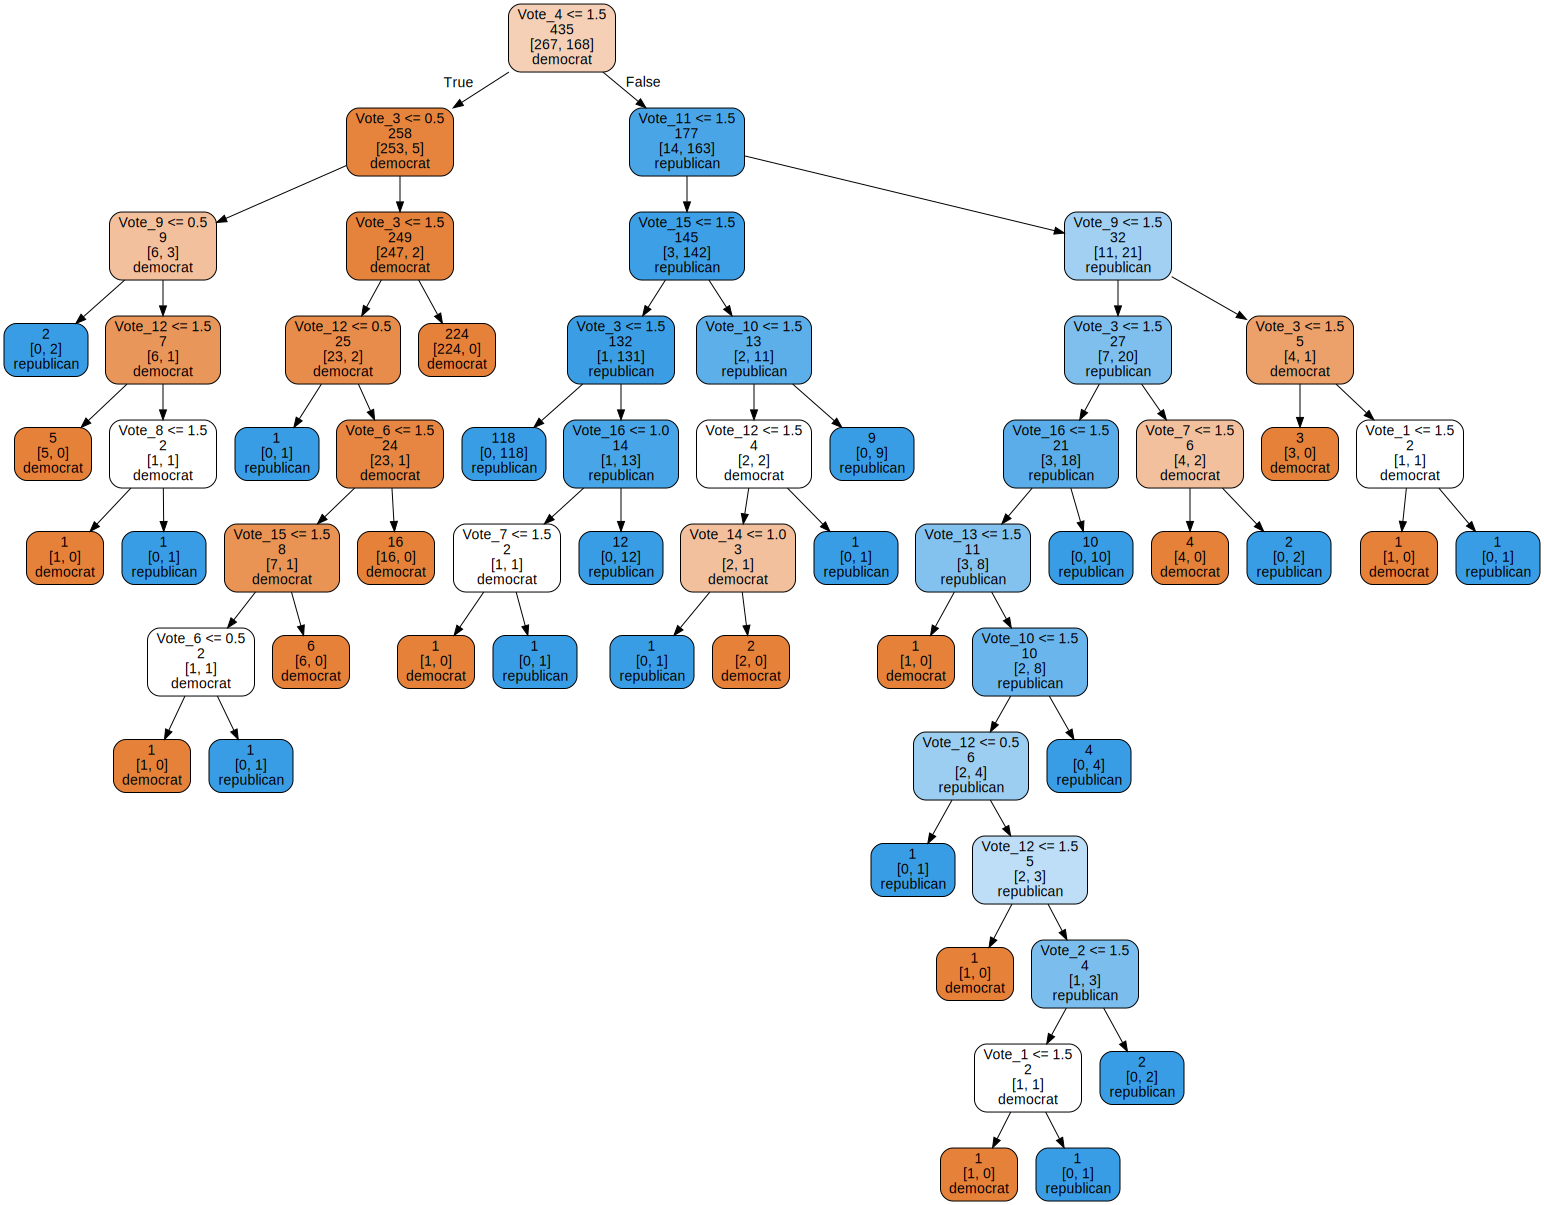

In [70]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df_labels.columns.values),  
                     class_names=list(sorted(df['class'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph.render('graph_cartoons') # para gravação em .pdf
graph

In [71]:
print('Mutual information and the attribute with higher Mutual Info: \n')
print(mutual_info_classif(X, y, discrete_features=True))
print(X.columns[ mutual_info_classif(X, y, discrete_features=True).argmax() ])
print()
print('Feature Importances and the attribute with higher Feature Importances: \n')
print(clf.feature_importances_)
print(X.columns[ clf.feature_importances_.argmax() ])

Mutual information and the attribute with higher Mutual Info: 

[8.73872293e-02 2.49962316e-04 2.99660509e-01 5.12951549e-01
 2.92820364e-01 1.02055280e-01 1.37023508e-01 2.35826473e-01
 2.15261646e-01 3.52248115e-03 7.43690939e-02 2.59411124e-01
 1.57899640e-01 2.32400929e-01 1.52771138e-01 7.06865546e-02]
Vote_4

Feature Importances and the attribute with higher Feature Importances: 

[0.0096977  0.00242442 0.02625533 0.82742211 0.         0.00565699
 0.01777912 0.00484885 0.02304583 0.00929984 0.02653266 0.02090316
 0.0056423  0.00646513 0.00609209 0.00793448]
Vote_4


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimators = [ LogisticRegression(),
                    neighbors.KNeighborsClassifier(),
                    DecisionTreeClassifier(),
                    RandomForestClassifier() ]
                                                   
param_grids = [ {},
                {'n_neighbors': [3,4,5,6,7]},
                {'max_depth': [2,3,4,5,6,7,8,9,10], 'criterion': ['gini','entropy']},
                {'n_estimators':[3,4,5,6]}]             
                
save_estimators = []

for i in range(len(base_estimators)):
  clf = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(clf.best_estimator_)
  save_estimators.append(clf.best_estimator_)
  print()
  print("Detailed classification report:")
  print()
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print()

LogisticRegression()

Detailed classification report:

              precision    recall  f1-score   support

    democrat       0.93      0.97      0.95        80
  republican       0.96      0.88      0.92        51

    accuracy                           0.94       131
   macro avg       0.94      0.93      0.93       131
weighted avg       0.94      0.94      0.94       131


KNeighborsClassifier(n_neighbors=4)

Detailed classification report:

              precision    recall  f1-score   support

    democrat       0.94      0.94      0.94        80
  republican       0.90      0.90      0.90        51

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131


DecisionTreeClassifier(max_depth=2)

Detailed classification report:

              precision    recall  f1-score   support

    democrat       0.95      0.96      0.96        80
  republican       0.94      0.92      0

In [73]:
[x.score(X_test, y_test) for x in save_estimators]

[0.9389312977099237,
 0.9236641221374046,
 0.9465648854961832,
 0.9465648854961832]

In [74]:
best = np.array( [x.score(X_test, y_test) for x in save_estimators] ).argmax()
save_estimators[best]

DecisionTreeClassifier(max_depth=2)

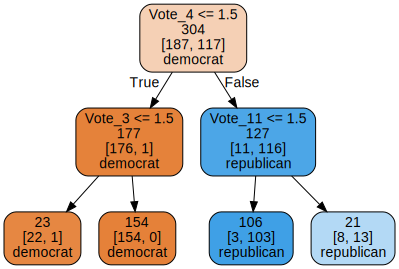

In [75]:
clf = save_estimators[best]

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df_labels.columns.values),  
                     class_names=list(sorted(df['class'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph.render('graph_cartoons') # para gravação em .pdf
graph